<a href="https://www.kaggle.com/code/sedatparlak/customer-segmentation-with-rfm?scriptVersionId=109740261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation with RFM

## About dataset

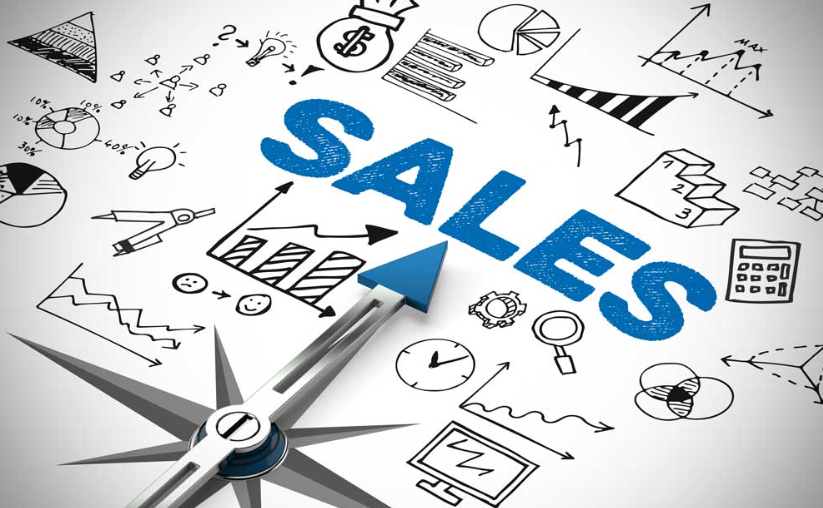

Sample Sales Data, Order Info, Sales, Customer, Shipping, etc., Used for Segmentation, Customer Analytics, Clustering and More. Inspired for retail analytics. This was originally used for Pentaho DI Kettle, But I found the set could be useful for Sales Simulation training.

Originally Written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solutions), Argentina. This work is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported License. Modified by Gus Segura June 2014.

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.width', 1000)

**Read csv file**

In [2]:
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='Windows-1252')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Get the neccesary columns**

In [4]:
df = df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'STATUS', 'PRODUCTCODE', 'CUSTOMERNAME']]

**Rename all columns name for be readable**

In [5]:
df.columns = ['order_number', 'quantity_ordered', 'price_each', 'sales', 'order_date', 'status', 'product_code', 'customer_name']
df.head()

,order_number,quantity_ordered,price_each,sales,order_date,status,product_code,customer_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,S10_1678,Land of Toys Inc.
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,S10_1678,Reims Collectables
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,S10_1678,Lyon Souveniers
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,S10_1678,Toys4GrownUps.com
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,S10_1678,Corporate Gift Ideas Co.


## Exploratory Data Analysis

**Check shape of data and column types**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_number      2823 non-null   int64  
 1   quantity_ordered  2823 non-null   int64  
 2   price_each        2823 non-null   float64
 3   sales             2823 non-null   float64
 4   order_date        2823 non-null   object 
 5   status            2823 non-null   object 
 6   product_code      2823 non-null   object 
 7   customer_name     2823 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 176.6+ KB


**Check unique values**

In [7]:
df.nunique()

order_number         307
quantity_ordered      58
price_each          1016
sales               2763
order_date           252
status                 6
product_code         109
customer_name         92
dtype: int64

**Check null values**

In [8]:
df.isnull().sum()

order_number        0
quantity_ordered    0
price_each          0
sales               0
order_date          0
status              0
product_code        0
customer_name       0
dtype: int64

**Describe numeric variables**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_number,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
quantity_ordered,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
price_each,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
sales,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8


**Convert order_date to datetime object**

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [11]:
df.dtypes

order_number                 int64
quantity_ordered             int64
price_each                 float64
sales                      float64
order_date          datetime64[ns]
status                      object
product_code                object
customer_name               object
dtype: object

**Check date min and max values**

In [12]:
df['order_date'].agg(['max', 'min'])

max   2005-05-31
min   2003-01-06
Name: order_date, dtype: datetime64[ns]

## Calculate RFM Metrics

Recency: how long ago they made a purchase.

Frequency: how often they make purchases.

Monetary: how much money they spend.

**Create analyze date**

analyze_date = max_order_date + 2 days

In [13]:
analyze_date = df['order_date'].max() + dt.timedelta(days=2)
analyze_date

Timestamp('2005-06-02 00:00:00')

**Groupby dataframe with customer_name**

In [14]:
rfm = df.groupby('customer_name').agg({'order_date': lambda x: (analyze_date - x.max()).days,
                                'order_number': lambda x: x.nunique(),
                                'sales': lambda x: x.sum()})

rfm.head()

,order_date,order_number,sales
customer_name,,,
"AV Stores, Co.",197,3,157807.81
Alpha Cognac,66,3,70488.44
Amica Models & Co.,266,2,94117.26
"Anna's Decorations, Ltd",85,4,153996.13
Atelier graphique,189,3,24179.96


**Add new column name to rfm dataframe**

In [15]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
customer_name,,,
"AV Stores, Co.",197,3,157807.81
Alpha Cognac,66,3,70488.44
Amica Models & Co.,266,2,94117.26
"Anna's Decorations, Ltd",85,4,153996.13
Atelier graphique,189,3,24179.96


In [16]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,92.0,183.826087,131.420524,2.00,82.2500,187.00,231.250,510.00
frequency,92.0,3.336957,2.924986,1.00,2.0000,3.00,3.000,26.00
monetary,92.0,109050.313587,110308.612808,9129.35,70129.4325,86522.61,120575.875,912294.11


## Calculate RFM Scores

In [17]:
rfm['recency_score'] = pd.cut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.cut(rfm['frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.cut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [18]:
rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
customer_name,,,,,,
"AV Stores, Co.",197,3,157807.81,4,1,1
Alpha Cognac,66,3,70488.44,5,1,1
Amica Models & Co.,266,2,94117.26,3,1,1
"Anna's Decorations, Ltd",85,4,153996.13,5,1,1
Atelier graphique,189,3,24179.96,4,1,1
"Australian Collectables, Ltd",24,3,64591.46,5,1,1
"Australian Collectors, Co.",185,5,200995.41,4,1,2
"Australian Gift Network, Co",120,3,59469.12,4,1,1
Auto Assoc. & Cie.,234,2,64834.32,3,1,1


**Calculate RF score**

In [19]:
rfm['rf_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score
customer_name,,,,,,,
"AV Stores, Co.",197,3,157807.81,4,1,1,41
Alpha Cognac,66,3,70488.44,5,1,1,51
Amica Models & Co.,266,2,94117.26,3,1,1,31
"Anna's Decorations, Ltd",85,4,153996.13,5,1,1,51
Atelier graphique,189,3,24179.96,4,1,1,41


## Segment customer with RF scores

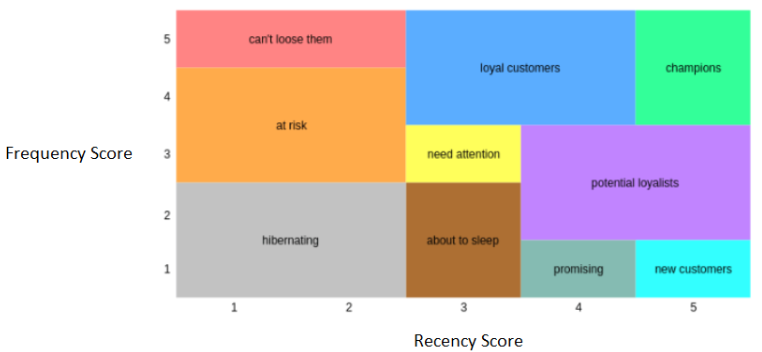

In [20]:
segments_map = {r'[1-2][1-2]': 'hibernating',
          r'[1-2][3-4]': 'at risk',
          r'[1-2]5': 'cant lose them',
          r'3[1-2]': 'about to sleep',
          r'33': 'need attention',
          r'[3-4][4-5]': 'loyal customers',
          r'41': 'promising',
          r'[4-5][2-3]': 'potential loyallists',
          r'51': 'new_customers',
          r'5[4-5]': 'champions'}

In [21]:
rfm['segments'] = rfm['rf_score'].replace(segments_map, regex=True)

**Check segments frequency**

In [22]:
rfm['segments'].value_counts()

promising         28
new_customers     27
about to sleep    23
hibernating       12
champions          2
Name: segments, dtype: int64

**Check segments mean, min and max**

In [23]:
rfm.groupby('segments').agg(['mean', 'min', 'max'])[['recency', 'frequency', 'monetary']]

recency            frequency               monetary                      
                      mean  min  max       mean min max           mean        min        max
segments                                                                                    
about to sleep  238.434783  209  286   2.304348   1   4   84026.922174   33144.93  131685.30
champions         3.000000    2    4  21.500000  17  26  783576.085000  654858.06  912294.11
hibernating     450.166667  390  510   2.083333   2   3   65294.094167   36019.04  142874.25
new_customers    48.185185    2   99   3.555556   3   5  115091.975926   52263.90  180124.90
promising       168.535714  113  202   3.214286   2   5   94351.606786    9129.35  200995.41